In [6]:
from sklearn.tree import DecisionTreeClassifier
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [279]:

real=open('clean_real.txt', 'r')
fake = open('clean_fake.txt', 'r')
realdata=real.readlines()
fakedata=fake.readlines()

real_df=pandas.DataFrame({'titles': realdata,'lable':'real'})
fake_df=pandas.DataFrame({'titles':fakedata,'lable': 'fake'})
dfnew = real_df.append(fake_df, ignore_index=True)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(realdata+fakedata)

featuredata=X.toarray()

feature=vectorizer.get_feature_names()

dfall=pandas.DataFrame(featuredata,columns=feature)
dfall['target_s']=dfnew['lable']
#real is 1 fake is 0
encoder = LabelEncoder()
encoder.fit(['real','fake'])
newarray=encoder.transform(dfall['target_s'])
dfall['target_s']=newarray

df_train, df_rest= train_test_split(dfall,test_size=0.3, random_state=100)

# df_test= dfall.sample(frac=0.7)
# df_valiate=(dfall-df_test)(frac=0.15)
#df = dfall.iloc[np.random.permutation(len(dfall))]


df_validate,df_test=train_test_split(df_rest,test_size=0.5, random_state=10)

In [280]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

In [292]:
#build two lists for criterion max_depth
critersion=['gini','entropy']
max_depth=[24,13,9,7,2]
df_train_x=df_train[df_train.columns[0:-1]]
df_validate_x=df_validate[df_validate.columns[0:-1]]
bestchoice=['critersion','maxdep',0]
for criteria in critersion:
    for maxdep in max_depth:
        classifier = DTC(
                max_depth=maxdep,
                criterion=criteria,
                splitter='best',
                random_state=1
        )
        X=df_train_x
        y=df_train['target_s']
        model=classifier.fit(X,y)
        y_pred=classifier.predict(df_validate_x)
        accuracy=accuracy_score(df_validate['target_s'],y_pred)
        print
        if accuracy > bestchoice[2]:
            bestchoice[2]=accuracy
            bestchoice[0]=criteria
            bestchoice[1]=maxdep
            
print('criteria:',bestchoice[0],'max_depth:', bestchoice[1], 'accuracy:', bestchoice[2])          


criteria: entropy max_depth: 24 accuracy: 0.7938775510204081


In [321]:
from sklearn import tree

In [322]:
classifier = DTC(
                max_depth=bestchoice[1],
                criterion=bestchoice[0],
                splitter='best',
                random_state=1)
X=df_train_x
y=df_train['target_s']
model=classifier.fit(X, y)

In [323]:
#dot=plot_tree(classifier, out_file=None, feature_names=vectorizer.get_feature_names(),class_names=['real','fake'])

[Text(167.4, 190.26, 'X[1598] <= 0.5\nentropy = 0.98\nsamples = 2286\nvalue = [936, 1350]'),
 Text(83.7, 135.9, 'X[5143] <= 0.5\nentropy = 1.0\nsamples = 1529\nvalue = [773, 756]'),
 Text(41.85, 81.53999999999999, 'X[2405] <= 0.5\nentropy = 0.99\nsamples = 1235\nvalue = [548, 687]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[5346] <= 0.5\nentropy = 0.79\nsamples = 294\nvalue = [225, 69]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[5143] <= 0.5\nentropy = 0.75\nsamples = 757\nvalue = [163, 594]'),
 Text(209.25, 81.53999999999999, 'X[2405] <= 0.5\nentropy = 0.67\nsamples = 677\nvalue = [120, 557]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[5507] <= 0.5\nentrop

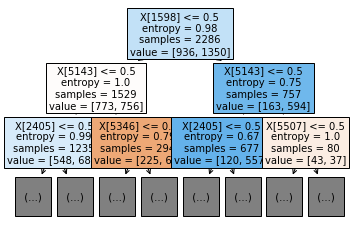

In [347]:
tree.plot_tree(model,max_depth=2,precision=2,fontsize=10, filled = True )

In [352]:
plt.figure(figsize=(12,8))
plt.show()

<Figure size 864x576 with 0 Axes>

In [206]:
# from sklearn.tree import export_graphviz
# dot_data = export_graphviz(classifier, out_file=None, 
#                                 feature_names=vectorizer.get_feature_names(),  
#                                 class_names=df_test['target_s'])

In [1]:

from sklearn.datasets import load_iris
from sklearn import tree
import collections

clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)

In [7]:

iris.target.dtype

dtype('int64')

In [12]:

encoder = LabelEncoder()
encoder.fit(['real','fake','a','b','c'])
newarray=encoder.transform(['real','fake','a','b','c'])





In [13]:
newarray

array([4, 3, 0, 1, 2])